#### OBJETIVO: Generar los plots de las comparativas del desempeño de los modelos simples

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Colores por sitio
COLORS = {
    "SP": "#00441b",
    "ST": "#fc4e2a",
    "BA": "#99000d",
    "MD": "#023858",
    "MX": "#3f007d"
}

SITES_ORDER = ["SP", "ST", "BA", "MD", "MX"]


In [26]:
#Funcion para hacer todoslos plots iguales
def scatter_compare(
    df, xcol, ycol,
    xlabel, ylabel,
    xlim=(0, 1), ylim=(0, 1),
    breaks=None,
    add_reg=False,
    reg_color="black", modelo=" "
):
    fig, ax = plt.subplots(figsize=(4, 4))

    for site in SITES_ORDER:
        sub = df[df["Sitio"] == site]
        ax.scatter(
            sub[xcol], sub[ycol],
            s=120,
            color=COLORS[site],
            label=site
        )

    # Línea 1:1
    ax.plot(
        [xlim[0], xlim[1]],
        [ylim[0], ylim[1]],
        linestyle="--",
        color="gray"
    )

    # Regresión global opcional
    if add_reg:
        x = df[xcol]
        y = df[ycol]
        m, b = np.polyfit(x, y, 1)
        xx = np.linspace(xlim[0], xlim[1], 100)
        ax.plot(xx, m * xx + b, color=reg_color, linewidth=2)

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_title(modelo, fontsize=13)


    if breaks is not None:
        ax.set_xticks(breaks)
        ax.set_yticks(breaks)

    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()


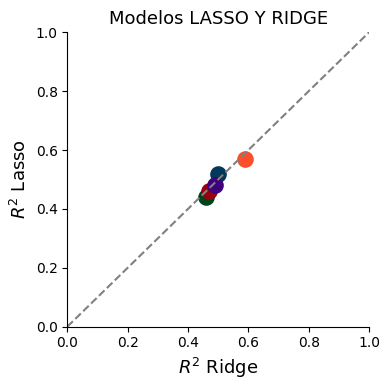

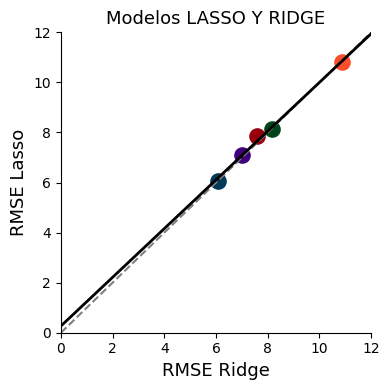

In [27]:
# Modelos LASSO Y RIDGE
df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "Ridge_R2": [0.46, 0.59, 0.47, 0.50, 0.49],
    "Lasso_R2": [0.44, 0.57, 0.46, 0.52, 0.48]
})

scatter_compare(
    df,
    xcol="Ridge_R2",
    ycol="Lasso_R2",
    xlabel=r"$R^2$ Ridge",
    ylabel=r"$R^2$ Lasso", modelo=r"Modelos LASSO Y RIDGE"
)

########################################################
df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "Ridge_RMSE": [8.15,10.89,7.58,6.07,7.01],
    "Lasso_RMSE": [8.12,10.83,7.87,6.06,7.10]
})


scatter_compare(
    df,
    xcol="Ridge_RMSE",
    ycol="Lasso_RMSE",
    xlabel="RMSE Ridge",
    ylabel="RMSE Lasso",
    xlim=(0, 12),
    ylim=(0, 12),
    breaks=np.arange(0, 13, 2),
    add_reg=True,
    modelo="Modelos LASSO Y RIDGE"
)




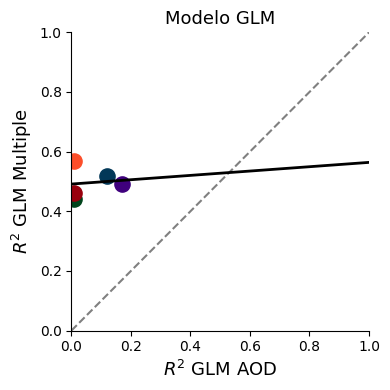

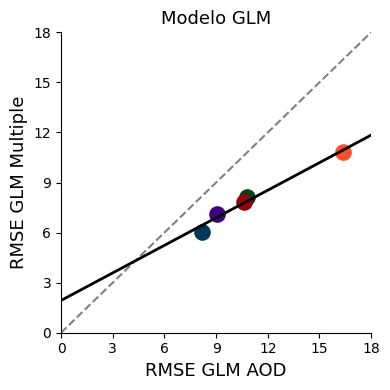

In [ ]:
#############################################
# Modelos GLM
df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "GLM_AOD_R2": [0.01,0.01,0.01,0.12,0.17],
    "GLM_multiple_R2": [0.44,0.57,0.46,0.52,0.49]
})

scatter_compare(
    df,
    "GLM_AOD_R2",
    "GLM_multiple_R2",
    xlabel=r"$R^2$ GLM AOD",
    ylabel=r"$R^2$ GLM Multiple",
    add_reg=True,  modelo="Modelo GLM"

)

df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "GLM_AOD_RMSE": [10.82,16.37,10.64,8.19,9.07],
    "GLM_multiple_RMSE": [8.16,10.82,7.85,6.06,7.10]
})

scatter_compare(
    df,
    "GLM_AOD_RMSE",
    "GLM_multiple_RMSE",
    xlabel="RMSE GLM AOD",
    ylabel="RMSE GLM Multiple",
    xlim=(0, 18),
    ylim=(0, 18),
    breaks=np.arange(0, 19, 3),
    add_reg=True ,  modelo="Modelo GLM"
)

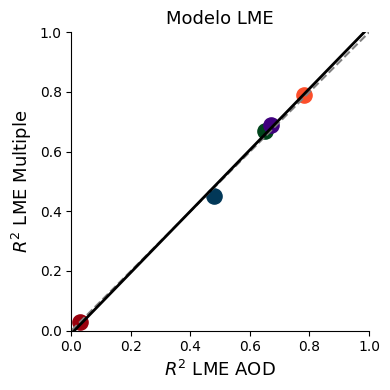

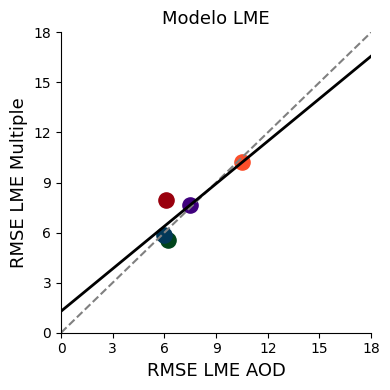

In [30]:
#############################################
# Modelos LME

df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "LME_AOD_R2": [0.65,0.78,0.03,0.48,0.67],
    "LME_multiple_R2": [0.67,0.79,0.03,0.45,0.69]
})

scatter_compare(
    df,
    "LME_AOD_R2",
    "LME_multiple_R2",
    xlabel=r"$R^2$ LME AOD",
    ylabel=r"$R^2$ LME Multiple",
    add_reg=True,  modelo="Modelo LME"

)
#### RMSE
df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "LME_AOD_RMSE": [6.21,10.51,6.09,5.99,7.48],
    "LME_multiple_RMSE": [5.55,10.23,7.96,5.87,7.63]
})

scatter_compare(
    df,
    "LME_AOD_RMSE",
    "LME_multiple_RMSE",
    xlabel="RMSE LME AOD",
    ylabel="RMSE LME Multiple",
    xlim=(0, 18),
    ylim=(0, 18),
    breaks=np.arange(0, 19, 3),
    add_reg=True ,  modelo="Modelo LME"
)

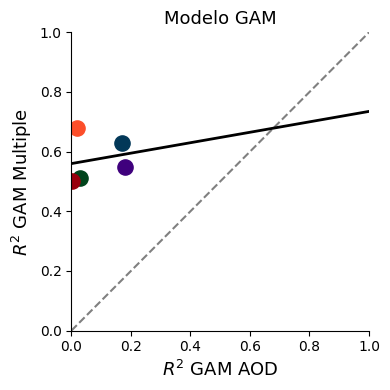

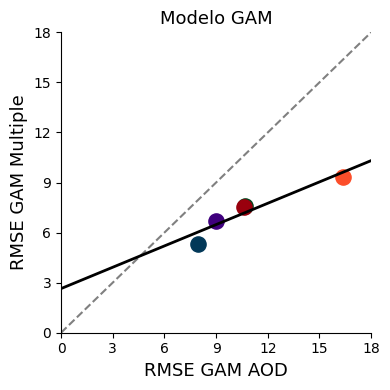

In [31]:
#############################################
# Modelos GAM
df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "GAM_AOD_R2": [0.03,0.02,0.001,0.17,0.18],
    "GAM_multiple_R2": [0.51,0.68,0.50,0.63,0.55]
})

scatter_compare(
    df,
    "GAM_AOD_R2",
    "GAM_multiple_R2",
    xlabel=r"$R^2$ GAM AOD",
    ylabel=r"$R^2$ GAM Multiple",
    add_reg=True,  modelo="Modelo GAM"

)

df = pd.DataFrame({
    "Sitio": ["SP", "ST", "BA", "MD", "MX"],
    "GAM_AOD_RMSE": [10.67,16.34,10.63,7.93,9.02],
    "GAM_multiple_RMSE": [7.60,9.33,7.54,5.33,6.68]
})

scatter_compare(
    df,
    "GAM_AOD_RMSE",
    "GAM_multiple_RMSE",
    xlabel="RMSE GAM AOD",
    ylabel="RMSE GAM Multiple",
    xlim=(0, 18),
    ylim=(0, 18),
    breaks=np.arange(0, 19, 3),
    add_reg=True ,  modelo="Modelo GAM"
)